In [5]:
import json
import datetime
import altair as alt
import pandas as pd
import numpy as np
import os
# 2018-08-10_00-00-00
# 2018-08-29_11_32_44
# 2018-08-29_22-54-16
# 2018-09-05_21-38-43
# 2018-09-07_11-34-48
base = 'hits/2018-09-05_21-38-43'
def cd(file):
    return os.path.join(base, file)

In [6]:
def duration_plot(assignments):
    times = []
    submit_times = []
    for l in assignments:
        submit = datetime.datetime.strptime(l['SubmitTime'][:-6], "%Y-%m-%d %H:%M:%S")
        accept = datetime.datetime.strptime(l['AcceptTime'][:-6], "%Y-%m-%d %H:%M:%S")
        submit_times.append(submit)
        diff = (submit - accept).total_seconds()/60.0
        times.append({"diff": diff})
    spec = {
      "data": {"values": times},
      "mark": "bar",
      "encoding": {
        "x": {
          "field": "diff",
          "type": "quantitative",
          "bin": {"step": 1} 
        },
        "y": {
          "aggregate": "count",
          "type": "quantitative"
        }
      }
    }
    print('min - max: ', min(submit_times), max(submit_times))
    print('mean duration: ', np.mean(list(map(lambda d: d['diff'], times))))
    return alt.VegaLite(spec)

min - max:  2018-09-05 21:44:13 2018-09-06 03:05:00
mean duration:  8.04856666667


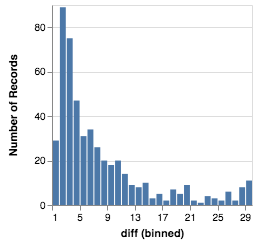

min - max:  2018-09-06 12:11:26 2018-09-06 21:31:06
mean duration:  7.71278333333


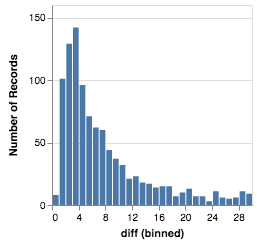

In [7]:
listener_assignments = json.load(open(cd('listener.assignments')))
speaker_assignments = json.load(open(cd('speaker.assignments')))
display(duration_plot(speaker_assignments))
display(duration_plot(listener_assignments))

In [8]:
import collections 

def by_worker(assign):
    workers = collections.defaultdict(int)
    for a in assign:
        workers[a['WorkerId']] += 1
    descending = sorted(workers.items(), key=lambda a: -a[1])
    return descending[0:10] 

for l in by_worker(listeners_assignments):
    print(*l)

print('\nspeakers')
for l in by_worker(speakers_assignments):
    print(*l)

NameError: name 'listeners_assignments' is not defined

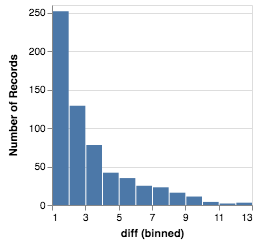

1724 620 252


,utterances
0,config axisBand tickSize
1,encoding x axis format
2,config axisBottom labelFlushOffset
3,encoding x scale zero
4,encoding size legend columns
5,config legend orient
6,encoding y axis labelBound
7,encoding opacity value
8,config point opacity
9,encoding text bin minstep


In [57]:
import pandas as pd
import collections
pd.set_option("display.max_rows", None)
dataf = open(cd('speaker.listener.jsonl'))
data = [json.loads(l) for l in dataf.readlines()]
utts = [l['q'][1]['utterance'] for l in data]
formulas = [l['q'][1]['targetFormula'] for l in data]
paths = list(map(lambda x: x[:x.index(':')], formulas))
pathsset = set(paths) 
pathcounter = collections.Counter(paths)
uniques = [k for k in pathcounter.keys() if pathcounter[k] <= 1]
freqfreq = pathcounter.values()
spec = {
      "data": {"values": [{"diff": v} for v in freqfreq]},
      "mark": "bar",
      "encoding": {
        "x": {
          "field": "diff",
          "type": "quantitative",
          "bin": {"step": 1} 
        },
        "y": {
          "aggregate": "count",
          "type": "quantitative"
        }
      }
    }
display(alt.VegaLite(spec))

print(len(paths), len(pathsset), len(uniques))
table = pd.DataFrame({'utterances': uniques})
display(table)
